In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pprint import pprint
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.experimental import enable_hist_gradient_boosting
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, HistGradientBoostingClassifier
from sklearn.metrics import confusion_matrix, roc_curve, auc
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, label_binarize
from sklearn.decomposition import PCA
from sklearn.svm import SVC
from sklearn.multiclass import OneVsRestClassifier
from xgboost import XGBClassifier
%matplotlib inline

df = pd.read_csv('train.csv').drop(columns=['Id'])
dfPred = pd.read_csv('testX.csv')

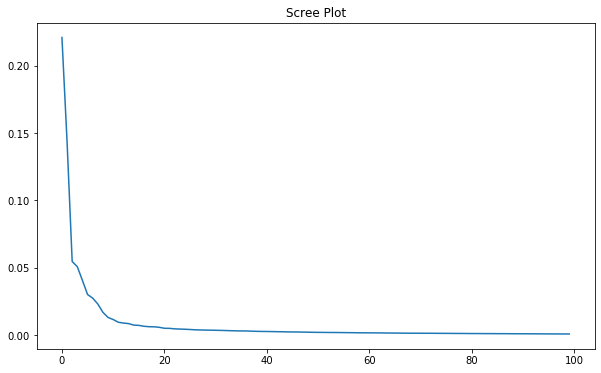

In [2]:
plt.figure(figsize=(10,6)) 
plt.plot(PCA(n_components = 100).fit(StandardScaler().fit_transform(df.iloc[:,1:])).explained_variance_ratio_)
plt.title("Scree Plot")
# plt.savefig("ScreePlot.png", dpi=300, bbox_inches='tight')
plt.show()

In [3]:
X_train, X_test, y_train, y_test = train_test_split(df.iloc[:,1:], df.iloc[:,0], test_size=0.2)
print('MultiNomialNB Mean Accuracy: ' + str(MultinomialNB().fit(X_train, y_train).score(X_test, y_test)))
X_train_pca, X_test_pca, y_train, y_test = train_test_split(PCA(n_components = 30).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:].values)), df.iloc[:,0], test_size=0.2)
cs = {'Random Forest': RandomForestClassifier(n_jobs = -1),
      'KNN': KNeighborsClassifier(n_jobs = -1),
      'SVM': SVC(),
      'LogisticRegression': LogisticRegression(max_iter = 1000),
      'LDA': LinearDiscriminantAnalysis(),
      'AdaBoost': AdaBoostClassifier(),
      'XGBoost': XGBClassifier(),
      'HistogramGradientBoost': HistGradientBoostingClassifier()}
for name, clf in cs.items():
    print(name + ' Mean Accuracy: ' + str(clf.fit(X_train_pca, y_train).score(X_test_pca, y_test)))

MultiNomialNB Mean Accuracy: 0.4718333333333333
Random Forest Mean Accuracy: 0.8695
KNN Mean Accuracy: 0.8585833333333334
SVM Mean Accuracy: 0.8613333333333333
LogisticRegression Mean Accuracy: 0.6778333333333333
LDA Mean Accuracy: 0.63675
AdaBoost Mean Accuracy: 0.6103333333333333
XGBoost Mean Accuracy: 0.8714166666666666
HistogramGradientBoost Mean Accuracy: 0.8738333333333334


In [4]:
X = PCA(n_components = 30).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:]))

In [5]:
modelRFC = GridSearchCV(RandomForestClassifier(random_state=42), {'n_estimators': [100, 200, 500], 'max_features': ['auto', 'log2', 0.25, 0.5, 0.75, 1.0], 'min_samples_split': [2, 4, 6],}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelRFC.cv_results_)
pprint(modelRFC.best_params_)

{'mean_fit_time': array([ 30.80361257,  61.51933827, 155.02166867,  29.65585356,
        59.34626069, 149.49067369,  29.36602364,  61.28197393,
       150.99883213,  29.49530783,  60.04167266, 149.85035133,
        32.05270882,  64.38866286, 150.09851289,  29.51664495,
        59.61200056, 148.94830298,  37.17029552,  76.15200634,
       185.02366986,  36.95674191,  73.88047819, 181.2576508 ,
        36.19039922,  78.89763193, 189.66395354,  75.29235015,
       147.33856134, 370.92595263,  73.52599807, 146.32965527,
       365.77149086,  70.31755114, 141.8323801 , 358.36573434,
       105.16038136, 217.04371052, 532.59989266, 103.16258917,
       215.09476705, 538.87324028, 103.86021924, 214.80654469,
       535.72371149, 145.1697401 , 291.58643265, 714.40859547,
       142.715132  , 285.06304722, 727.47653408, 143.69549069,
       291.95671778, 697.58673959]),
 'mean_score_time': array([0.39551268, 0.70040126, 1.99226303, 0.37103939, 0.73953218,
       2.02041602, 0.31938415, 0.759211

In [8]:
modelKNN = GridSearchCV(KNeighborsClassifier(), {'weights': ['uniform', 'distance'],'n_neighbors': [*range(1, 30)],'p': [1, 2],}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelKNN.cv_results_)
pprint(modelKNN.best_params_)

{'mean_fit_time': array([0.25850277, 0.23688784, 0.25566564, 0.26191692, 0.23372288,
       0.25918236, 0.27382021, 0.22028985, 0.22560072, 0.22504163,
       0.26962414, 0.24496503, 0.22306461, 0.27562604, 0.23513136,
       0.26539712, 0.24467134, 0.24918118, 0.23658047, 0.23375263,
       0.23152804, 0.26114831, 0.27076068, 0.25002046, 0.23869882,
       0.23144979, 0.27074957, 0.22585087, 0.24808698, 0.2348671 ,
       0.25366921, 0.2419652 , 0.28523297, 0.25574594, 0.24310489,
       0.27544737, 0.26333857, 0.27995   , 0.2376564 , 0.27335815,
       0.25078106, 0.22791438, 0.26082783, 0.24398685, 0.25386438,
       0.23207941, 0.25582156, 0.2775713 , 0.25501151, 0.25808415,
       0.25746827, 0.25596828, 0.24443693, 0.25822902, 0.25065837,
       0.25367422, 0.25271225, 0.2632226 , 0.24353313, 0.25426412,
       0.24863524, 0.25101967, 0.2417047 , 0.24809861, 0.26117773,
       0.24860549, 0.26379213, 0.2459703 , 0.2546227 , 0.26716671,
       0.23270459, 0.27472901, 0.26400008, 0

In [8]:
modelSVM = GridSearchCV(SVC(kernel='rbf', gamma='scale'), {'C':[10, 15, 20, 25, 30, 35]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelSVM.cv_results_)
pprint(modelSVM.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 6 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done   6 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done  13 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  6.5min remaining:  2.0min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  8.2min remaining:   54.4s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  8.3min finished


{'mean_fit_time': array([81.55327678, 87.69743104, 87.32895269, 86.6975574 , 88.30346622,
       90.39406328]),
 'mean_score_time': array([11.39592252, 11.01789842, 10.85458031, 11.15145764, 10.53003569,
        9.5193603 ]),
 'mean_test_score': array([0.88043333, 0.88215   , 0.88323333, 0.8845    , 0.88505   ,
       0.88561667]),
 'param_C': masked_array(data=[10, 15, 20, 25, 30, 35],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'C': 10}, {'C': 15}, {'C': 20}, {'C': 25}, {'C': 30}, {'C': 35}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.88033333, 0.8825    , 0.88433333, 0.8855    , 0.88566667,
       0.88641667]),
 'split1_test_score': array([0.87725   , 0.87975   , 0.881     , 0.88233333, 0.88316667,
       0.88308333]),
 'split2_test_score': array([0.88275   , 0.88416667, 0.88566667, 0.88775   , 0.88833333,
       0.88841667]),
 'split3_test_score': array([

In [6]:
parameters = {'learning_rate': [0.05, 0.07, 0.1, 0.15], 
              'max_iter': [150, 200, 250, 300], 
              'max_leaf_nodes': [35, 37, 39, 41],
              'min_samples_leaf': [22, 24, 26, 28]}
modelHGBC = GridSearchCV(HistGradientBoostingClassifier(random_state=42), parameters, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelHGBC.cv_results_)
pprint(modelHGBC.best_params_)

Fitting 5 folds for each of 256 candidates, totalling 1280 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done  18 tasks      | elapsed:  1.4min
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done  48 tasks      | elapsed:  2.7min
[Parallel(n_jobs=-1)]: Done  65 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  4.2min
[Parallel(n_jobs=-1)]: Done 101 tasks      | elapsed:  4.8min
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=-1)]: Done 141 tasks      | elapsed:  6.8min
[Parallel(n_jobs=-1)]: Done 162 tasks      | elapsed:  8.0min
[Parallel(n_jobs=-1)]: Done 185 tasks      | elapsed:  9.2min
[Parallel(n_jobs=-1)]: Done 208 tasks      | elapsed: 10.4min
[Parallel(n_jobs=-1)]: Done 233 tasks      | elapsed: 12.0min
[Parallel(n_jobs=-1)]: Done 258 tasks      | elapsed: 13.7min
[Parallel(n_jobs=-1)]: Done 285 tasks      | elapsed: 1

{'mean_fit_time': array([ 82.0920639 ,  77.54197245,  77.33467836,  80.0411098 ,
        78.96600237,  80.07030959,  84.61137185,  83.6419333 ,
        80.39874625,  80.32542477,  81.78073292,  85.90909691,
        93.38263993,  91.78231316,  93.65064363,  94.23889427,
        96.83856978,  94.84555721, 100.74018383,  99.90961752,
       108.31431847, 108.79935651, 113.61723275, 110.09807429,
       104.28792911, 106.30489855, 100.57009554, 110.59608202,
       113.50913477, 117.32575254, 117.34316134, 125.32282524,
       116.44329152, 117.47705474, 121.6238534 , 114.6294775 ,
       132.97852702, 117.74004712, 133.714675  , 140.98515053,
       121.64150257, 128.51648688, 132.57290158, 133.88728819,
       136.19064846, 140.13415923, 140.20475588, 141.0949501 ,
       142.22095695, 128.23407068, 139.82846298, 154.28931427,
       152.50838261, 145.34661474, 154.61944451, 153.05744171,
       156.04930367, 152.40567064, 154.09621911, 163.99603887,
       166.02877584, 164.6619401 , 17

            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 39,
             'min_samples_leaf': 24},
            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 39,
             'min_samples_leaf': 26},
            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 39,
             'min_samples_leaf': 28},
            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 41,
             'min_samples_leaf': 22},
            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 41,
             'min_samples_leaf': 24},
            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 41,
             'min_samples_leaf': 26},
            {'learning_rate': 0.15,
             'max_iter': 300,
             'max_leaf_nodes': 41,
             'min_samples_leaf': 28}],
 'rank_test_score': array(

In [11]:
clf = XGBClassifier(learning_rate =0.1, max_depth = 5, min_child_weight = 1, gamma = 0, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1)
modelXGBoost = GridSearchCV(clf, {'n_estimators': [100, 200, 300, 400, 500, 600]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelXGBoost.cv_results_)
pprint(modelXGBoost.best_params_)

Fitting 5 folds for each of 6 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  30 | elapsed:  2.1min remaining: 18.5min
[Parallel(n_jobs=-1)]: Done   7 out of  30 | elapsed:  3.5min remaining: 11.5min
[Parallel(n_jobs=-1)]: Done  11 out of  30 | elapsed:  5.0min remaining:  8.6min
[Parallel(n_jobs=-1)]: Done  15 out of  30 | elapsed:  5.3min remaining:  5.3min
[Parallel(n_jobs=-1)]: Done  19 out of  30 | elapsed:  6.6min remaining:  3.8min
[Parallel(n_jobs=-1)]: Done  23 out of  30 | elapsed:  7.8min remaining:  2.4min
[Parallel(n_jobs=-1)]: Done  27 out of  30 | elapsed:  9.0min remaining:   59.7s
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:  9.1min finished


{'mean_fit_time': array([119.84822927, 219.56780119, 305.3811625 , 384.41938848,
       461.17895079, 533.8300283 ]),
 'mean_score_time': array([0.50544534, 1.07399731, 1.54610424, 2.07345886, 2.54564295,
       3.00381932]),
 'mean_test_score': array([0.8516    , 0.86851667, 0.8752    , 0.8792    , 0.88111667,
       0.88191667]),
 'param_n_estimators': masked_array(data=[100, 200, 300, 400, 500, 600],
             mask=[False, False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'n_estimators': 100},
            {'n_estimators': 200},
            {'n_estimators': 300},
            {'n_estimators': 400},
            {'n_estimators': 500},
            {'n_estimators': 600}],
 'rank_test_score': array([6, 5, 4, 3, 2, 1], dtype=int32),
 'split0_test_score': array([0.84775   , 0.868     , 0.875     , 0.87908333, 0.88158333,
       0.883     ]),
 'split1_test_score': array([0.85391667, 0.86975   , 0.87675   , 0.88225   , 0.88325   ,
       0.88

In [12]:
clf = XGBClassifier(learning_rate =0.1, n_estimators = 400, gamma = 0, subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1)
modelXGBoost = GridSearchCV(clf, {'max_depth': [3, 5, 7, 9], 'min_child_weight': [1, 3, 5]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelXGBoost.cv_results_)
pprint(modelXGBoost.best_params_)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:  5.1min
[Parallel(n_jobs=-1)]: Done   2 out of  60 | elapsed:  5.2min remaining: 149.9min
[Parallel(n_jobs=-1)]: Done   9 out of  60 | elapsed:  5.7min remaining: 32.1min
[Parallel(n_jobs=-1)]: Done  16 out of  60 | elapsed:  9.4min remaining: 25.9min
[Parallel(n_jobs=-1)]: Done  23 out of  60 | elapsed:  9.6min remaining: 15.5min
[Parallel(n_jobs=-1)]: Done  30 out of  60 | elapsed: 10.0min remaining: 10.0min
[Parallel(n_jobs=-1)]: Done  37 out of  60 | elapsed: 13.4min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done  44 out of  60 | elapsed: 15.8min remaining:  5.7min
[Parallel(n_jobs=-1)]: Done  51 out of  60 | elapsed: 19.0min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  58 out of  60 | elapsed: 20.2min remaining:   41.8s
[Parallel(n_jobs=-1)]: Done  60 out of  60 | elapsed: 20.3min finished


{'mean_fit_time': array([332.29430938, 320.85232563, 340.83227587, 571.80082674,
       574.15986428, 575.11749511, 801.08054786, 781.49952984,
       618.49986119, 800.55316305, 754.66023083, 638.18289995]),
 'mean_score_time': array([1.71390839, 1.68289561, 1.79816508, 2.75823665, 2.64261537,
       2.61658731, 4.07577291, 4.17617841, 3.13404307, 4.93949156,
       4.8156116 , 4.01190329]),
 'mean_test_score': array([0.85338333, 0.85325   , 0.8534    , 0.8792    , 0.8782    ,
       0.87811667, 0.88696667, 0.88621667, 0.88541667, 0.89035   ,
       0.8883    , 0.88886667]),
 'param_max_depth': masked_array(data=[3, 3, 3, 5, 5, 5, 7, 7, 7, 9, 9, 9],
             mask=[False, False, False, False, False, False, False, False,
                   False, False, False, False],
       fill_value='?',
            dtype=object),
 'param_min_child_weight': masked_array(data=[1, 3, 5, 1, 3, 5, 1, 3, 5, 1, 3, 5],
             mask=[False, False, False, False, False, False, False, False,
          

In [13]:
clf = XGBClassifier(learning_rate =0.1, n_estimators = 400, max_depth=9, min_child_weight=1,subsample=0.8, colsample_bytree=0.8, scale_pos_weight=1)
modelXGBoost = GridSearchCV(clf, {'gamma': [0, 0.1, 0.2, 0.3, 0.4]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelXGBoost.cv_results_)
pprint(modelXGBoost.best_params_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   3 out of  25 | elapsed: 11.8min remaining: 86.7min
[Parallel(n_jobs=-1)]: Done   6 out of  25 | elapsed: 11.9min remaining: 37.8min
[Parallel(n_jobs=-1)]: Done   9 out of  25 | elapsed: 12.5min remaining: 22.2min
[Parallel(n_jobs=-1)]: Done  12 out of  25 | elapsed: 13.0min remaining: 14.1min
[Parallel(n_jobs=-1)]: Done  15 out of  25 | elapsed: 13.1min remaining:  8.7min
[Parallel(n_jobs=-1)]: Done  18 out of  25 | elapsed: 13.3min remaining:  5.2min
[Parallel(n_jobs=-1)]: Done  21 out of  25 | elapsed: 13.3min remaining:  2.5min
[Parallel(n_jobs=-1)]: Done  25 out of  25 | elapsed: 13.5min finished


{'mean_fit_time': array([746.01994171, 760.74214692, 773.9803884 , 748.2939187 ,
       763.51183543]),
 'mean_score_time': array([5.68160553, 5.58071241, 4.88633957, 5.04948311, 4.38721366]),
 'mean_test_score': array([0.89035   , 0.88973333, 0.8893    , 0.88938333, 0.88888333]),
 'param_gamma': masked_array(data=[0, 0.1, 0.2, 0.3, 0.4],
             mask=[False, False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'gamma': 0},
            {'gamma': 0.1},
            {'gamma': 0.2},
            {'gamma': 0.3},
            {'gamma': 0.4}],
 'rank_test_score': array([1, 2, 4, 3, 5], dtype=int32),
 'split0_test_score': array([0.89175   , 0.89133333, 0.88816667, 0.89      , 0.88833333]),
 'split1_test_score': array([0.894     , 0.89191667, 0.89366667, 0.89258333, 0.891     ]),
 'split2_test_score': array([0.89375   , 0.89408333, 0.89408333, 0.89333333, 0.89325   ]),
 'split3_test_score': array([0.88541667, 0.88533333, 0.886     , 0.88416667, 0.884666

In [15]:
clf = XGBClassifier(learning_rate =0.1, n_estimators = 400, max_depth=9, min_child_weight=1, gamma = 0, scale_pos_weight=1)
modelXGBoost = GridSearchCV(clf, {'subsample': [0.6, 0.7, 0.8, 0.9], 'colsample_bytree': [0.6, 0.7, 0.8, 0.9]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelXGBoost.cv_results_)
pprint(modelXGBoost.best_params_)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 out of  80 | elapsed: 14.4min remaining: 101.0min
[Parallel(n_jobs=-1)]: Done  19 out of  80 | elapsed: 15.0min remaining: 48.0min
[Parallel(n_jobs=-1)]: Done  28 out of  80 | elapsed: 15.8min remaining: 29.3min
[Parallel(n_jobs=-1)]: Done  37 out of  80 | elapsed: 17.2min remaining: 19.9min
[Parallel(n_jobs=-1)]: Done  46 out of  80 | elapsed: 30.9min remaining: 22.8min
[Parallel(n_jobs=-1)]: Done  55 out of  80 | elapsed: 32.5min remaining: 14.8min
[Parallel(n_jobs=-1)]: Done  64 out of  80 | elapsed: 33.4min remaining:  8.3min
[Parallel(n_jobs=-1)]: Done  73 out of  80 | elapsed: 34.4min remaining:  3.3min
[Parallel(n_jobs=-1)]: Done  80 out of  80 | elapsed: 35.4min finished


{'mean_fit_time': array([ 772.69303765,  829.44440546,  869.27745056,  897.76527753,
        879.16381435,  928.78066587,  968.56443524, 1023.54688129,
        977.62260823, 1035.60463104, 1061.44930153, 1070.88729191,
       1046.68926892, 1071.23452406, 1075.18015876, 1071.93179827]),
 'mean_score_time': array([10.8991117 , 11.3211936 , 12.66858182, 11.90686054, 10.81357388,
       12.07124672, 10.00294127,  9.63769989,  9.18468132,  7.97153726,
        7.08754311,  5.96824498,  6.23360591,  5.32991042,  4.60870891,
        4.35590458]),
 'mean_test_score': array([0.88678333, 0.88786667, 0.88816667, 0.88931667, 0.88846667,
       0.88911667, 0.88911667, 0.89023333, 0.8894    , 0.88978333,
       0.89035   , 0.88998333, 0.88941667, 0.89035   , 0.8912    ,
       0.8905    ]),
 'param_colsample_bytree': masked_array(data=[0.6, 0.6, 0.6, 0.6, 0.7, 0.7, 0.7, 0.7, 0.8, 0.8, 0.8,
                   0.8, 0.9, 0.9, 0.9, 0.9],
             mask=[False, False, False, False, False, False, False

In [17]:
clf = XGBClassifier(learning_rate =0.1, n_estimators = 400, max_depth=9, min_child_weight=1, gamma = 0, colsample_bytree = 0.9, subsample = 0.8, scale_pos_weight=1)
modelXGBoost = GridSearchCV(clf, {'reg_alpha':[0, 1e-5, 1e-2, 0.1]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelXGBoost.cv_results_)
pprint(modelXGBoost.best_params_)

Fitting 5 folds for each of 4 candidates, totalling 20 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   4 out of  20 | elapsed: 11.5min remaining: 46.2min
[Parallel(n_jobs=-1)]: Done   7 out of  20 | elapsed: 11.6min remaining: 21.6min
[Parallel(n_jobs=-1)]: Done  10 out of  20 | elapsed: 11.7min remaining: 11.7min
[Parallel(n_jobs=-1)]: Done  13 out of  20 | elapsed: 11.7min remaining:  6.3min
[Parallel(n_jobs=-1)]: Done  16 out of  20 | elapsed: 11.8min remaining:  2.9min
[Parallel(n_jobs=-1)]: Done  20 out of  20 | elapsed: 11.9min finished


{'mean_fit_time': array([684.99746504, 696.21447458, 694.87204075, 705.13066273]),
 'mean_score_time': array([5.8396368 , 5.70891433, 5.46137471, 4.80177174]),
 'mean_test_score': array([0.8912    , 0.89101667, 0.89098333, 0.89036667]),
 'param_reg_alpha': masked_array(data=[0, 1e-05, 0.01, 0.1],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'reg_alpha': 0},
            {'reg_alpha': 1e-05},
            {'reg_alpha': 0.01},
            {'reg_alpha': 0.1}],
 'rank_test_score': array([1, 2, 3, 4], dtype=int32),
 'split0_test_score': array([0.88975   , 0.89183333, 0.89075   , 0.89233333]),
 'split1_test_score': array([0.89566667, 0.89683333, 0.89475   , 0.89358333]),
 'split2_test_score': array([0.89533333, 0.89341667, 0.89516667, 0.89408333]),
 'split3_test_score': array([0.88825, 0.886  , 0.88675, 0.88625]),
 'split4_test_score': array([0.887     , 0.887     , 0.8875    , 0.88558333]),
 'std_fit_time': array([3.94400998, 3

In [18]:
clf = XGBClassifier(learning_rate =0.1, n_estimators = 500, min_child_weight=1, gamma = 0, colsample_bytree = 0.9, subsample = 0.8, scale_pos_weight=1, reg_alpha = 0)
modelXGBoost = GridSearchCV(clf, {'max_depth':[9, 10, 15]}, n_jobs = -1, verbose=10).fit(X, df.iloc[:,0])
pprint(modelXGBoost.cv_results_)
pprint(modelXGBoost.best_params_)

Fitting 5 folds for each of 3 candidates, totalling 15 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 out of  15 | elapsed: 14.0min remaining: 90.8min
[Parallel(n_jobs=-1)]: Done   4 out of  15 | elapsed: 14.0min remaining: 38.6min
[Parallel(n_jobs=-1)]: Done   6 out of  15 | elapsed: 14.8min remaining: 22.1min
[Parallel(n_jobs=-1)]: Done   8 out of  15 | elapsed: 15.0min remaining: 13.1min
[Parallel(n_jobs=-1)]: Done  10 out of  15 | elapsed: 15.1min remaining:  7.6min
[Parallel(n_jobs=-1)]: Done  12 out of  15 | elapsed: 17.4min remaining:  4.4min
[Parallel(n_jobs=-1)]: Done  15 out of  15 | elapsed: 17.7min finished


{'mean_fit_time': array([ 833.4837502 ,  888.76680331, 1043.67915239]),
 'mean_score_time': array([6.67306004, 6.51782646, 6.20736313]),
 'mean_test_score': array([0.89115   , 0.89155   , 0.89313333]),
 'param_max_depth': masked_array(data=[9, 10, 15],
             mask=[False, False, False],
       fill_value='?',
            dtype=object),
 'params': [{'max_depth': 9}, {'max_depth': 10}, {'max_depth': 15}],
 'rank_test_score': array([3, 2, 1], dtype=int32),
 'split0_test_score': array([0.89016667, 0.89133333, 0.89283333]),
 'split1_test_score': array([0.89508333, 0.89575   , 0.89558333]),
 'split2_test_score': array([0.89583333, 0.89491667, 0.89741667]),
 'split3_test_score': array([0.8885    , 0.88733333, 0.89033333]),
 'split4_test_score': array([0.88616667, 0.88841667, 0.8895    ]),
 'std_fit_time': array([6.70779069, 8.04355372, 9.61231924]),
 'std_score_time': array([0.47525361, 0.20955141, 0.3858567 ]),
 'std_test_score': array([0.00374774, 0.0033651 , 0.00301598])}
{'max_depth

In [2]:
def cm_plot(cm, y_test, title):
    N = list(map(lambda clazz : sum(y_test == clazz), [*range(5)]))
    plt.figure(figsize=(7,5)) 
    c = plt.pcolormesh([cm[j, :] / N[j] for j in range(5)], vmin=0.0, vmax=1.0)
    plt.title(title)
    plt.colorbar()
    plt.ylabel('Actual')
    plt.xlabel('Predicted')
    plt.xticks(0.5 + np.arange(5), np.arange(5))
    plt.yticks(0.5 + np.arange(5), np.arange(5))
    c.update_scalarmappable()
    ax = c.axes
    for p, color, value in zip(c.get_paths(), c.get_facecolors(), c.get_array()):
        x, y = p.vertices[:-2, :].mean(0)
        ax.text(x, y, "%.2f" % value, ha="center", va="center", color=(0.0, 0.0, 0.0) if sum(color[:2] > 0.3) >= 2 else (1.0, 1.0, 1.0))
#     plt.savefig(title+'.png', bbox_inches='tight', dpi=300)
    return plt.show()

def roc_plot(y_test, y_score, name):
    fpr, tpr, roc_auc = dict(), dict(), dict()
    for i in range(5):
        fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(7,7))
    plt.plot([0, 1], [0, 1], 'k--')
    [plt.plot(fpr[i], tpr[i], label= 'Class ' + str(i) + ' ROC(area = %0.2f)' % roc_auc[i]) for i in range(5)]
    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc="lower right")
    plt.title(name + ' ROC Plot')
#     plt.savefig(name +'_ROC.png', bbox_inches='tight', dpi=300)
    return plt.show()  

def gen_csv(model, name):
    result = dfPred[['Id']].copy()
    result['Label'] = model.predict(X_pred)
    result.to_csv('result' + name + '.csv', encoding='utf-8', index=False)

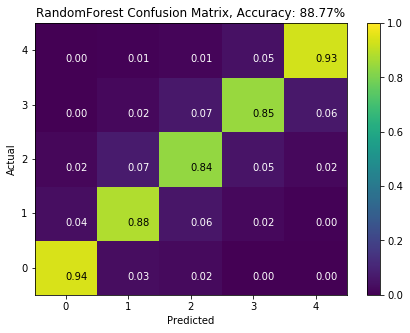

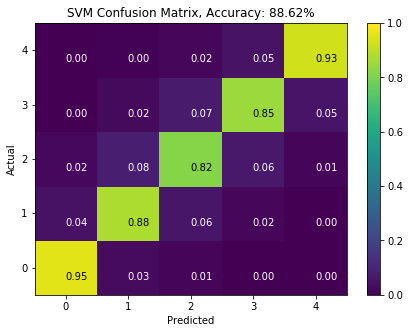

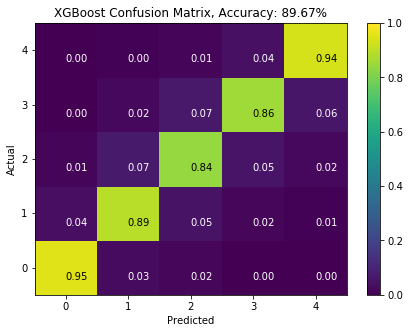

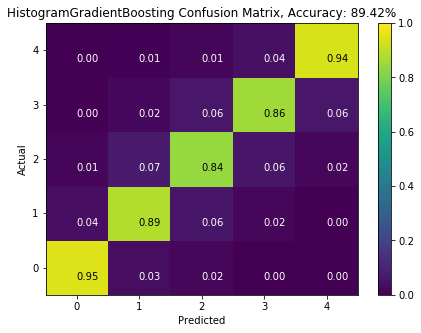

In [4]:
pca = PCA(n_components = 30)
ss = StandardScaler()
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca.fit_transform(ss.fit_transform(df.iloc[:,1:].values)), df.iloc[:,0], test_size=0.2)
X_pred = pca.transform(ss.transform(dfPred.iloc[:,1:].values))
cs2 = {'RandomForest': RandomForestClassifier(max_features=0.5, min_samples_split=2, n_estimators=500, n_jobs = -1),
       'SVM': SVC(C = 35),
       'XGBoost': XGBClassifier(learning_rate =0.05, n_estimators = 2000, max_depth=15, min_child_weight=1, gamma = 0, colsample_bytree = 0.9, subsample = 0.8, scale_pos_weight=1, reg_alpha = 0),
       'HistogramGradientBoosting': HistGradientBoostingClassifier(l2_regularization = 0.0001, learning_rate=0.01, max_bins = 128, max_depth = 15, max_iter = 2000, max_leaf_nodes=64, min_samples_leaf=4)}
#        'HistogramGradientBoosting': HistGradientBoostingClassifier(learning_rate=0.15, max_iter = 300, max_leaf_nodes=41, min_samples_leaf=22)}
for name, clf in cs2.items():
    clf.fit(X_train_pca, y_train)
    cm_plot(confusion_matrix(y_test, clf.predict(X_test_pca)), y_test, name + ' Confusion Matrix, Accuracy: ' + '{0:.2f}%'.format(clf.score(X_test_pca, y_test)*100))
#     gen_csv(clf, name)

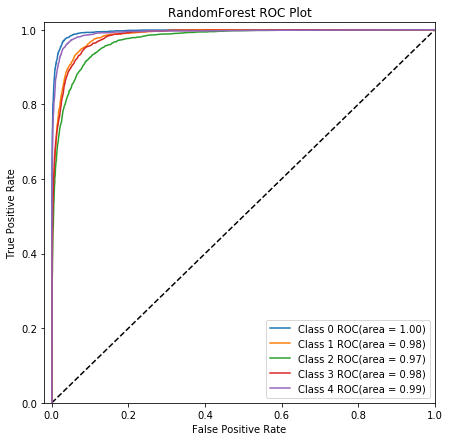

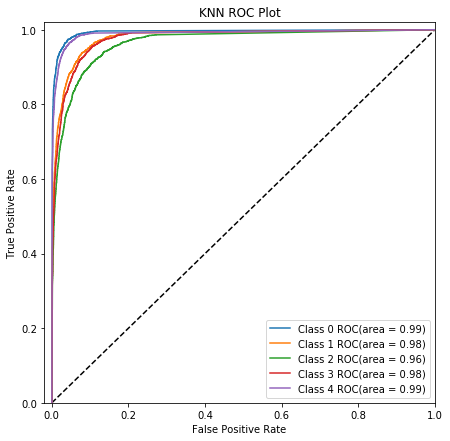

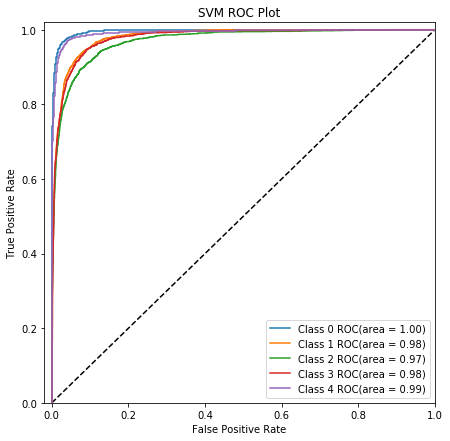

In [23]:
X_train_pca, X_test_pca, y_train, y_test = train_test_split(PCA(n_components = 30).fit_transform(StandardScaler().fit_transform(df.iloc[:,1:].values)), label_binarize(df.iloc[:,0], classes=[*range(5)]), test_size=0.2)
roc_plot(y_test, OneVsRestClassifier(RandomForestClassifier(max_features=0.5, min_samples_split=2, n_estimators=500, n_jobs = -1)).fit(X_train_pca, y_train).predict_proba(X_test_pca), 'RandomForest')
roc_plot(y_test, OneVsRestClassifier(SVC(C = 35)).fit(X_train_pca, y_train).decision_function(X_test_pca), 'SVM')
roc_plot(y_test, OneVsRestClassifier(HistGradientBoostingClassifier(learning_rate=0.15, max_iter = 300, max_leaf_nodes=41, min_samples_leaf=22)).fit(X_train_pca, y_train).decision_function(X_test_pca), 'HistogramGradientBoosting')

In [ ]:
pca = PCA(n_components = 100)
ss = StandardScaler()
X = pca.fit_transform(ss.fit_transform(df.iloc[:,1:].values))
X_pred = pca.transform(ss.transform(dfPred.iloc[:,1:].values))
clf = XGBClassifier(learning_rate =0.01, n_estimators = 5000, max_depth=15, min_child_weight=1, gamma = 0, colsample_bytree = 0.9, subsample = 0.8, scale_pos_weight=1, reg_alpha = 0)
clf.fit(X, df.iloc[:,0])
gen_csv(clf, 'XGBoost2')

In [4]:
pca = PCA(n_components = 100)
ss = StandardScaler()
X_train_pca, X_test_pca, y_train, y_test = train_test_split(pca.fit_transform(ss.fit_transform(df.iloc[:,1:].values)), df.iloc[:,0], test_size=0.2)
clf = XGBClassifier(learning_rate =0.01, n_estimators = 5000, max_depth=15, min_child_weight=1, gamma = 0, colsample_bytree = 0.9, subsample = 0.8, scale_pos_weight=1, reg_alpha = 0)
clf.fit(X_train_pca, y_train)
clf.score(X_test_pca, y_test)

0.90275